### Objective - Create a content based recommender system using the zomato database.

#### Columns description

- url- represents the url of the restaurant in the zomato website

- address - specifies the address of the restaurant in Bengaluru

- name -  name of the restaurant

- online_order-  whether online ordering is available in the restaurant or not

- book_table - table book option available or not

- rate -  overall rating of the restaurant out of 5

- votes - total number of rating for the restaurant as of the above mentioned date

- phone - phone number of the restaurant

- location - neighborhood in which the restaurant is located

- rest_type Tyepe of the restaurant

- dish_liked - dishes people liked in the restaurant

- cuisines - food styles, separated by comma

- approx_cost(for two people) - the approximate cost for meal for two people

- reviews_list - list of tuples containing reviews for the restaurant, each tuple

- menu_item - list of menus available in the restaurant

- listed_in(type) type of meal

- listed_in(city) contains the neighborhood in which the restaurant is listed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
 

In [3]:
df = pd.read_csv('zomato.csv')
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.dtypes.value_counts()

object    16
int64      1
dtype: int64

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.drop(columns=['url','address','phone'],axis=1,inplace=True)

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:

df['rate'] = df['rate'].str.split('/').str.get(0) # strip '/5'
df = df[df.rate !='NEW'] # remove the rows which has rate=='NEW'
df = df[df.rate !='-'].reset_index(drop=True) #remove the rows which has rate=='NEW'
df['rate'] = df['rate'].astype('float') # convert the rate column from object to float
df['rate'] = df['rate'].fillna(round(df['rate'].mean(),2)) # fill na values with mean
df.shape # shape of the dataframe

(49440, 14)

In [10]:
df.shape

(49440, 14)

In [11]:
# 'approx_cost(for two people)' column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('float') # Change the object to Float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         49440 non-null  object 
 1   online_order                 49440 non-null  object 
 2   book_table                   49440 non-null  object 
 3   rate                         49440 non-null  float64
 4   votes                        49440 non-null  int64  
 5   location                     49419 non-null  object 
 6   rest_type                    49215 non-null  object 
 7   dish_liked                   23492 non-null  object 
 8   cuisines                     49395 non-null  object 
 9   approx_cost(for two people)  49099 non-null  float64
 10  reviews_list                 49440 non-null  object 
 11  menu_item                    49440 non-null  object 
 12  listed_in(type)              49440 non-null  object 
 13  listed_in(city) 

In [12]:
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [13]:
df.groupby(['name','location','listed_in(city)']).size().reset_index()

,name,location,listed_in(city),0
0,#FeelTheROLL,Bellandur,Bellandur,1
1,#FeelTheROLL,Bellandur,Sarjapur Road,1
2,#L-81 Cafe,HSR,BTM,2
3,#L-81 Cafe,HSR,HSR,2
4,#L-81 Cafe,HSR,Koramangala 4th Block,2
...,...,...,...,...
31557,sCoolMeal,BTM,BTM,1
31558,sCoolMeal,BTM,Koramangala 4th Block,1
31559,sCoolMeal,BTM,Koramangala 5th Block,1
31560,sCoolMeal,BTM,Koramangala 6th Block,1


In [14]:
### Q - Q - ## Which Cities have online deliveries option?
df[df['online_order'] == 'Yes']['listed_in(city)'].value_counts()

BTM                      2032
Koramangala 7th Block    1752
Koramangala 4th Block    1731
Koramangala 5th Block    1713
Koramangala 6th Block    1620
Jayanagar                1545
JP Nagar                 1272
HSR                      1113
Indiranagar              1023
Bannerghatta Road         945
Marathahalli              927
Brigade Road              904
Brookefield               900
Church Street             873
MG Road                   840
Whitefield                828
Old Airport Road          778
Bellandur                 777
Basavanagudi              770
Sarjapur Road             756
Kammanahalli              754
Kalyan Nagar              745
Lavelle Road              727
Frazer Town               697
Residency Road            693
Malleshwaram              656
Rajajinagar               534
Banashankari              533
Electronic City           497
New BEL Road              407
Name: listed_in(city), dtype: int64

In [15]:
df[df['online_order'] == 'No']['listed_in(city)'].value_counts()

BTM                      1076
Koramangala 7th Block    1072
Koramangala 5th Block     996
Lavelle Road              975
Koramangala 4th Block     948
MG Road                   930
Church Street             896
Residency Road            894
Koramangala 6th Block     868
Brigade Road              811
Jayanagar                 747
Whitefield                743
Indiranagar               718
JP Nagar                  693
Marathahalli              679
Electronic City           609
Old Airport Road          593
Bannerghatta Road         556
Kammanahalli              528
Rajajinagar               522
HSR                       513
Brookefield               507
Kalyan Nagar              485
Sarjapur Road             468
Frazer Town               448
Basavanagudi              427
Malleshwaram              412
Bellandur                 376
New BEL Road              318
Banashankari              290
Name: listed_in(city), dtype: int64

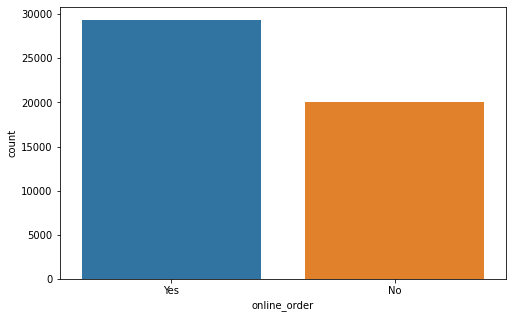

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.online_order,data=df)
plt.show()

#### Q - Which are the top 10 restaurants in Bengalore?

In [17]:
df['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [18]:
df[['name','rate']].groupby(by=['rate']).size().nlargest(10) 

rate
3.7    11596
3.9     3972
3.8     3873
3.6     3316
4.0     3183
4.1     2948
3.5     2784
3.4     2476
3.3     2310
4.2     2184
dtype: int64

#### Q - Which are the top 10 locations ?

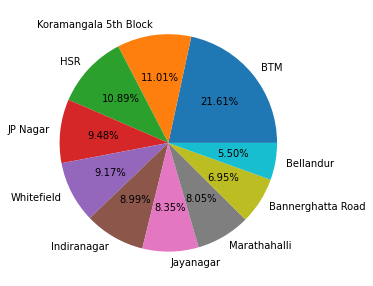

In [19]:
plt.figure(figsize=(15,5))
location = df['location'].value_counts().values
labels = df['location'].value_counts(). index
plt.pie(x=location[:10],labels=labels[:10],autopct='%1.2f%%')
plt.show()

- BTM, Koramangala (7th Block,5th Block,4th Block,6th Block) are top 5 locations

No. of restaurants accepting online orders: 
 Yes    29342
No     20098
Name: online_order, dtype: int64


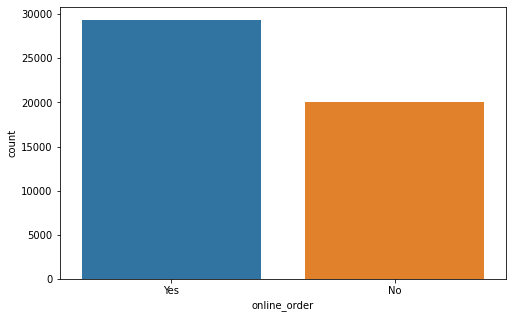

In [20]:
plt.figure(figsize=(8,5))
print("No. of restaurants accepting online orders: \n",df['online_order'].value_counts())
sns.countplot(x=df['online_order'],data=df)
plt.show() 

- 29342 restaurants accept online orders
- 20098 restaurants do not accept online orders

No. of restaurants offer table booking facility: 
 No     43120
Yes     6320
Name: book_table, dtype: int64


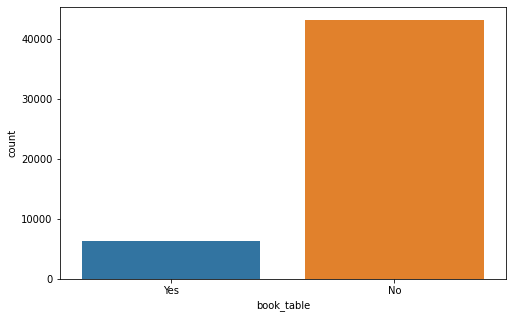

In [21]:
plt.figure(figsize=(8,5))
print("No. of restaurants offer table booking facility: \n",df['book_table'].value_counts())
sns.countplot(x=df['book_table'],data=df)
plt.show() 

- There are total 43120 restaurants who do not allow to book the table
- Only 6320 restaurants have table booking facilty

In [22]:
type = df['listed_in(type)'].value_counts()
type

Delivery              24728
Dine-out              17008
Desserts               3453
Cafes                  1645
Drinks & nightlife     1073
Buffet                  864
Pubs and bars           669
Name: listed_in(type), dtype: int64

Types of Restaurants in Bengaluru: 
Delivery              24728
Dine-out              17008
Desserts               3453
Cafes                  1645
Drinks & nightlife     1073
Buffet                  864
Pubs and bars           669
Name: listed_in(type), dtype: int64


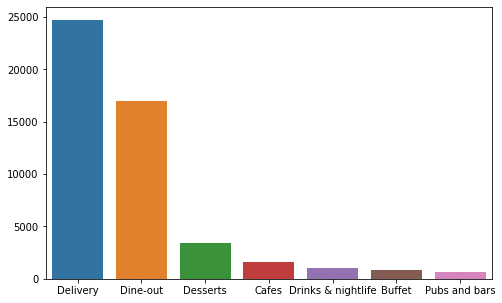

In [23]:
plt.figure(figsize=(8,5))
type = df['listed_in(type)'].value_counts()
print("Types of Restaurants in Bengaluru: ")
print(type)
sns.barplot(y=type.values,x=type.index,data=df)
plt.show() 

- Bengaluru being the tech capital of India, majority people love to order online food.

#### Q -  Which are the most common cuisins? 

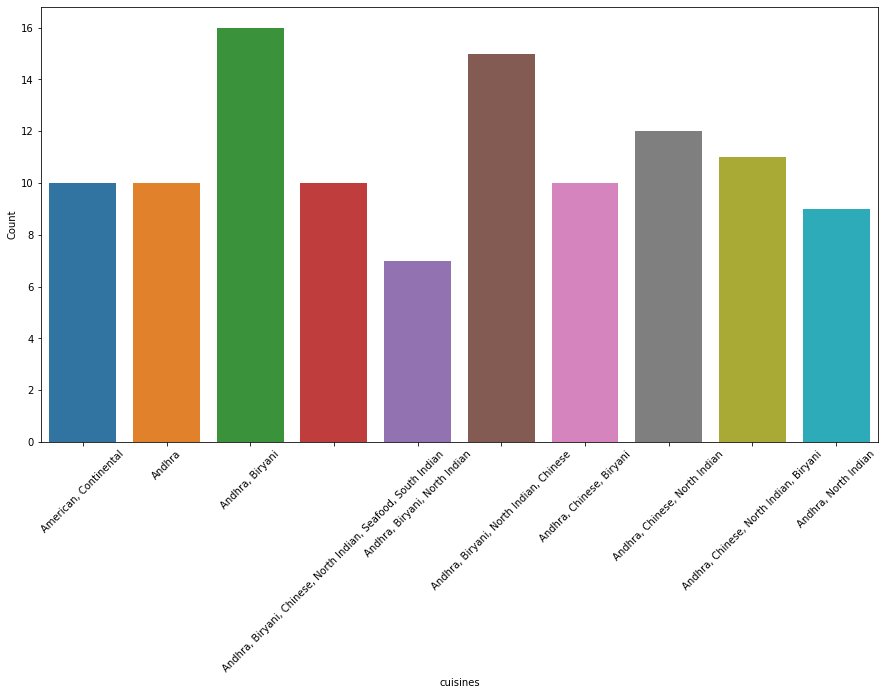

In [24]:
plt.figure(figsize=(15,8))
favorate_cuisine = df.groupby(['location','cuisines']).size().reset_index().rename(columns={0:'Count'})
favorate_cuisine_top_10 = favorate_cuisine.head(10)
sns.barplot(y='Count',x='cuisines',data=favorate_cuisine_top_10,errwidth=0.2)
plt.xticks(rotation = 45)
plt.show()

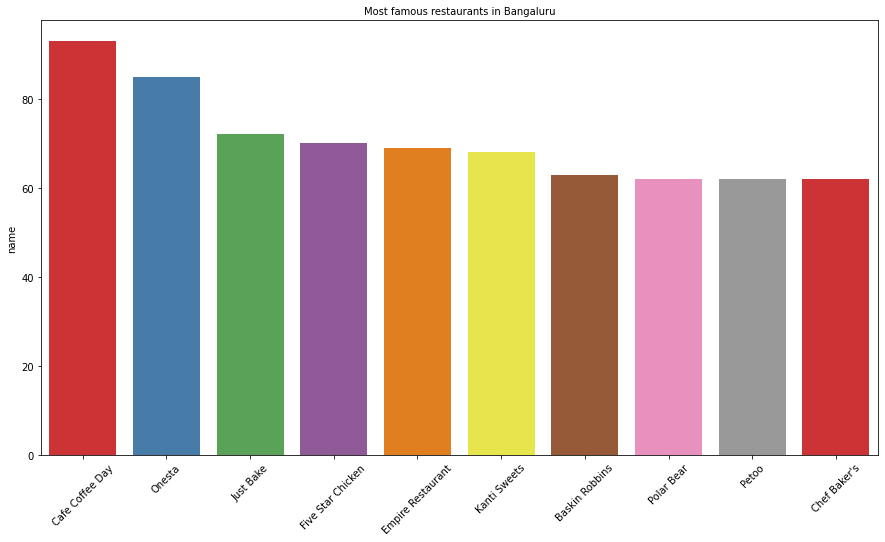

In [25]:
plt.figure(figsize=(15,8))
top_10_famous_restaurants=df['name'].value_counts()[:10]
sns.barplot(x=top_10_famous_restaurants.index,y=top_10_famous_restaurants,palette='Set1')
plt.title("Most famous restaurants in Bangaluru",size=10)
plt.xticks(rotation = 45)
plt.show()

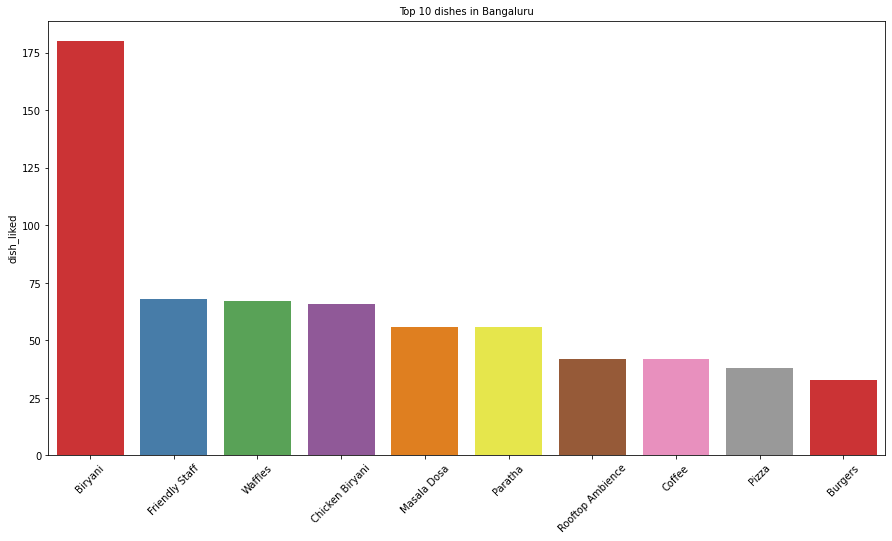

In [26]:
plt.figure(figsize=(15,8))
top_10_dishes=df['dish_liked'].value_counts()[:10]
sns.barplot(x=top_10_dishes.index,y=top_10_dishes,palette='Set1')
plt.title("Top 10 dishes in Bangaluru",size=10)
plt.xticks(rotation = 45)
plt.show()

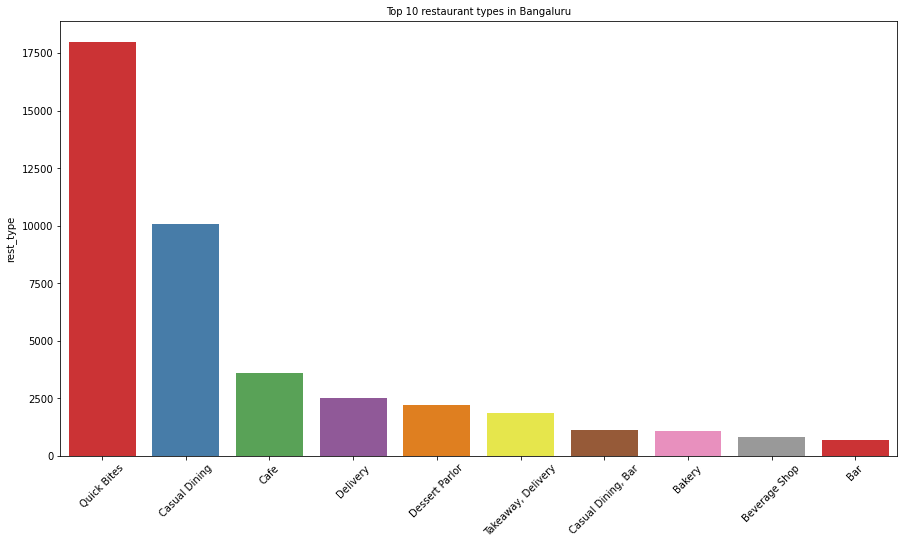

In [27]:
plt.figure(figsize=(15,8))
top_10_restaurant_types=df['rest_type'].value_counts()[:10]
sns.barplot(x=top_10_restaurant_types.index,y=top_10_restaurant_types,palette='Set1')
plt.title("Top 10 restaurant types in Bangaluru",size=10)
plt.xticks(rotation = 45)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         49440 non-null  object 
 1   online_order                 49440 non-null  object 
 2   book_table                   49440 non-null  object 
 3   rate                         49440 non-null  float64
 4   votes                        49440 non-null  int64  
 5   location                     49419 non-null  object 
 6   rest_type                    49215 non-null  object 
 7   dish_liked                   23492 non-null  object 
 8   cuisines                     49395 non-null  object 
 9   approx_cost(for two people)  49099 non-null  float64
 10  reviews_list                 49440 non-null  object 
 11  menu_item                    49440 non-null  object 
 12  listed_in(type)              49440 non-null  object 
 13  listed_in(city) 

In [29]:
df.duplicated().sum()

53

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                          21
rest_type                        225
dish_liked                     25907
cuisines                          45
approx_cost(for two people)      340
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [32]:
df.dropna(how='any',inplace=True)

In [33]:
df.online_order.replace(('Yes','No'),(True,False),inplace=True)
df.book_table.replace(('Yes','No'),(True,False),inplace=True)

In [34]:
# Lower case convesrion of the reviews text
df['reviews_list'] = df['reviews_list'].str.lower()

In [35]:
# Remove Punctuation
import string

puntuation_to_remove = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('','',puntuation_to_remove))
df['reviews_list'] = df['reviews_list'] .apply(lambda text:remove_punctuation(text))
df['reviews_list'].head(3)

0    rated 40 ratedn  a beautiful place to dine int...
1    rated 40 ratedn  had been here for dinner with...
2    rated 30 ratedn  ambience is not that good eno...
Name: reviews_list, dtype: object

In [36]:
# Remove Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in(text).split() if word not in STOPWORDS])
df['reviews_list'] = df['reviews_list'].apply(lambda text:remove_stopwords(text))
df['reviews_list'].head(3)

0    rated 40 ratedn beautiful place dine inthe int...
1    rated 40 ratedn dinner family turned good choo...
2    rated 30 ratedn ambience good enough pocket fr...
Name: reviews_list, dtype: object

In [37]:
import re
# Remove URLs from 'reviews_list'
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'',text)
df['reviews_list'] = df['reviews_list'].apply(lambda text:remove_urls(text))
df['reviews_list'].head(5)

0    rated 40 ratedn beautiful place dine inthe int...
1    rated 40 ratedn dinner family turned good choo...
2    rated 30 ratedn ambience good enough pocket fr...
3    rated 40 ratedn great food proper karnataka st...
4    rated 40 ratedn good restaurant neighbourhood ...
Name: reviews_list, dtype: object

In [38]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [39]:
# Drop unnecessary columns
df=df.drop(['votes','rest_type', 'dish_liked','menu_item'],axis=1)
# Take sample of dataframe
df_percent = df.sample(frac=0.5)
df_percent.shape

(11638, 10)

In [40]:
restaurants = list(df['name'].unique())
def get_top_words(column,top_nu_of_words,nu_of_word):
    vec = COuntVectorizer(ngram_range = nu_of_word,stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(words_freq,key = lambda x:x[1],reverese=True)
    return words_freq[:top_nu_of_words]       

#### TF-IDF Vectorization
- TF-IDF (Term Frequency-Inverse Document Frequency) vectors for each document. This will give you a matrix where each column represents a word in the general vocabulary (all words that appear in at least one document) and each column represents a restaurant, as before.

- TF-IDF is the statistical method of assessing the meaning of a word in a given document. Now, I will use the TF-IDF vectorization on the dataset: 
 

In [41]:
df_percent.head(3)

,name,online_order,book_table,rate,location,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
16127,Biriyani Zone,True,False,3.9,HSR,"Biryani, North Indian, Chinese, Seafood",800.0,rated 40 ratedn hyderabadi chicken biryani mus...,Dine-out,HSR
4852,No 10 Fort Cochin,True,True,3.8,St. Marks Road,"Biryani, Kerala, Seafood, South Indian",800.0,rated 20 ratedn mutton curry mostly bone grist...,Delivery,Brigade Road
45176,The Culinarium,False,False,4.0,Vasanth Nagar,"Cafe, Desserts, Beverages",1100.0,rated 40 ratedn went vegan ice cream ordered c...,Cafes,Residency Road


In [42]:
df_percent.set_index('name', inplace=True)

In [43]:
df_percent

,online_order,book_table,rate,location,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
name,,,,,,,,,
Biriyani Zone,True,False,3.9,HSR,"Biryani, North Indian, Chinese, Seafood",800.0,rated 40 ratedn hyderabadi chicken biryani mus...,Dine-out,HSR
No 10 Fort Cochin,True,True,3.8,St. Marks Road,"Biryani, Kerala, Seafood, South Indian",800.0,rated 20 ratedn mutton curry mostly bone grist...,Delivery,Brigade Road
The Culinarium,False,False,4.0,Vasanth Nagar,"Cafe, Desserts, Beverages",1100.0,rated 40 ratedn went vegan ice cream ordered c...,Cafes,Residency Road
Cafe Cassia& Deli,False,False,4.2,Ulsoor,"Lebanese, Mediterranean, Cafe",1000.0,rated 50 ratedn beautifully designed little ca...,Cafes,Lavelle Road
Mani's Dum Biryani,True,False,3.9,Koramangala 1st Block,Biryani,750.0,rated 40 ratedn awesome biriyani restaurant lo...,Delivery,Koramangala 4th Block
...,...,...,...,...,...,...,...,...,...
Cauvery Hyderabadi Biriyani,False,False,3.8,Marathahalli,"North Indian, Chinese",600.0,rated 30 ratedn summary decent enough food ok ...,Delivery,Bellandur
Hi Seoul,True,False,4.1,Kalyan Nagar,Korean,800.0,rated 10 ratedn youre vegetarian looking order...,Delivery,Kammanahalli
Oye Amritsar,True,True,3.8,JP Nagar,North Indian,600.0,rated 40 ratedn place one best puniabi food ba...,Delivery,BTM


In [44]:
indices = pd.Series(df_percent.index)
indices

0                        Biriyani Zone
1                    No 10 Fort Cochin
2                       The Culinarium
3                    Cafe Cassia& Deli
4                   Mani's Dum Biryani
                     ...              
11633      Cauvery Hyderabadi Biriyani
11634                         Hi Seoul
11635                     Oye Amritsar
11636    Based On A True Story- Bistro
11637                  Punjabi Kitchen
Name: name, Length: 11638, dtype: object

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0,stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

cosine_similarities = linear_kernel(tfidf_matrix,tfidf_matrix)

#### Function to recommend Restaurants

In [46]:
def recommend(name,cosine_similarities = cosine_similarities):
    recommnend_restaurants = []  #list of restaurants to recommend
    idx = indices[indices==name].index[0]
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False) # # Find the restaurants with a similar cosine-sin value and sort
    top_20 = list(score_series.iloc[:21].index) #Extract top 20 restaurant indices with a similar cosine-sin value
    
    
    for i in top_20:
        recommnend_restaurants.append(list(df_percent.index)[i])
    
    df_recommended = pd.DataFrame(columns=['cuisines', 'rate', 'approx_cost(for two people)'])
    
    for i in recommnend_restaurants:
        df_recommended = df_recommended.append(pd.DataFrame(df_percent[['cuisines','rate', 'approx_cost(for two people)']][df_percent.index == i].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_recommended = df_recommended.drop_duplicates(subset=['cuisines', 'rate', 'approx_cost(for two people)'],keep=False)
    df_recommended = df_recommended.sort_values(by='rate',ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_recommended)), name))
    
    return df_recommended
recommend('Taj Hotel')

TOP 8 RESTAURANTS LIKE Taj Hotel WITH SIMILAR REVIEWS: 


,cuisines,rate,approx_cost(for two people)
Hammered,"North Indian, Thai, Japanese, Continental, Cafe",4.7,1300.0
Koramangala Social,"American, North Indian, Chinese, Finger Food",4.6,1500.0
Meghana Foods,"Biryani, Seafood, Andhra, North Indian",4.4,600.0
Hammered,"North Indian, Continental, Cafe",4.4,1200.0
Hammered,"North Indian, South Indian, Continental, Asian",4.3,1200.0
Meghana Foods,"Biryani, Chinese, North Indian, Seafood",4.2,750.0
Hoot,"Continental, Italian, North Indian",4.2,1400.0
Cafe Azzure,"Cafe, Continental, Italian, Burger",4.2,1200.0
